Make rocAUC figure , comparing different models' predictions
* use output reports from SB , on test set, human

* Revs: 

In [1]:
from sklearn.metrics import *
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ProtOnly = "reports/Hum_noUTR_reports-miRNA/predictions/test/predictions.tsv.gz"
ProtSeqOnly = "reports/ProtSeqOnly_Hum_reports-miRNA/predictions/test/predictions.tsv.gz"
UTROnly = "reports/3UTR_HUM_artifact-miRNA-Genes-54/predictions/test/predictions.tsv.gz"
ProtUTRAll = "reports/allFeat_HUM_reports-miRNA-Genes-50/predictions/test/predictions.tsv.gz"


https://stackoverflow.com/questions/39195628/plot-multiple-roc-from-multiple-column-values

In [3]:
df = pd.read_csv(ProtOnly,sep="\t")
display(df.describe().round(4))
# y1 ground truth
y1 = df["bool_mir_target"]

## protein (with all feats)
y2 = df["probability_1"]

df

,bool_mir_target,bool_mir_target_predicted,probability_0,probability_1
count,3810.0000,3810.0000,3810.0000,3810.0000
mean,0.7583,0.8940,0.2469,0.7531
std,0.4282,0.3079,0.2036,0.2036
min,0.0000,0.0000,0.0000,0.0090
25%,1.0000,1.0000,0.0912,0.6544
50%,1.0000,1.0000,0.2037,0.7963
75%,1.0000,1.0000,0.3456,0.9088
max,1.0000,1.0000,0.9910,1.0000


,bool_mir_target,bool_mir_target_predicted,probability_0,probability_1
0,1,1,0.072578,0.927422
1,1,1,0.286675,0.713325
2,1,1,0.111495,0.888505
3,1,1,0.077167,0.922833
4,1,1,0.086753,0.913247
...,...,...,...,...
3805,0,1,0.342214,0.657786
3806,1,1,0.199533,0.800467
3807,1,1,0.111829,0.888171
3808,1,1,0.057387,0.942613


In [4]:
df = pd.read_csv(UTROnly,sep="\t")
## UTR only
y3 = df["probability_1"]

In [5]:
df = pd.read_csv(ProtSeqOnly,sep="\t")
## protein sequence only
y4 = df["probability_1"]

df = pd.read_csv(ProtUTRAll,sep="\t")
## unified
y5 = df["probability_1"]

In [6]:
## check baselines
df["naive"] = df["bool_mir_target"].mean()
df["mode"] = 1#df["bool_mir_target"].mode()

print("naive mean target baseline auc",roc_auc_score(y_true=df["bool_mir_target"],
    y_score=df["naive"]))

print("naive majority target baseline auc",roc_auc_score(y_true=df["bool_mir_target"],
    y_score=df["mode"]))

naive mean target baseline auc 0.5
naive majority target baseline auc 0.5


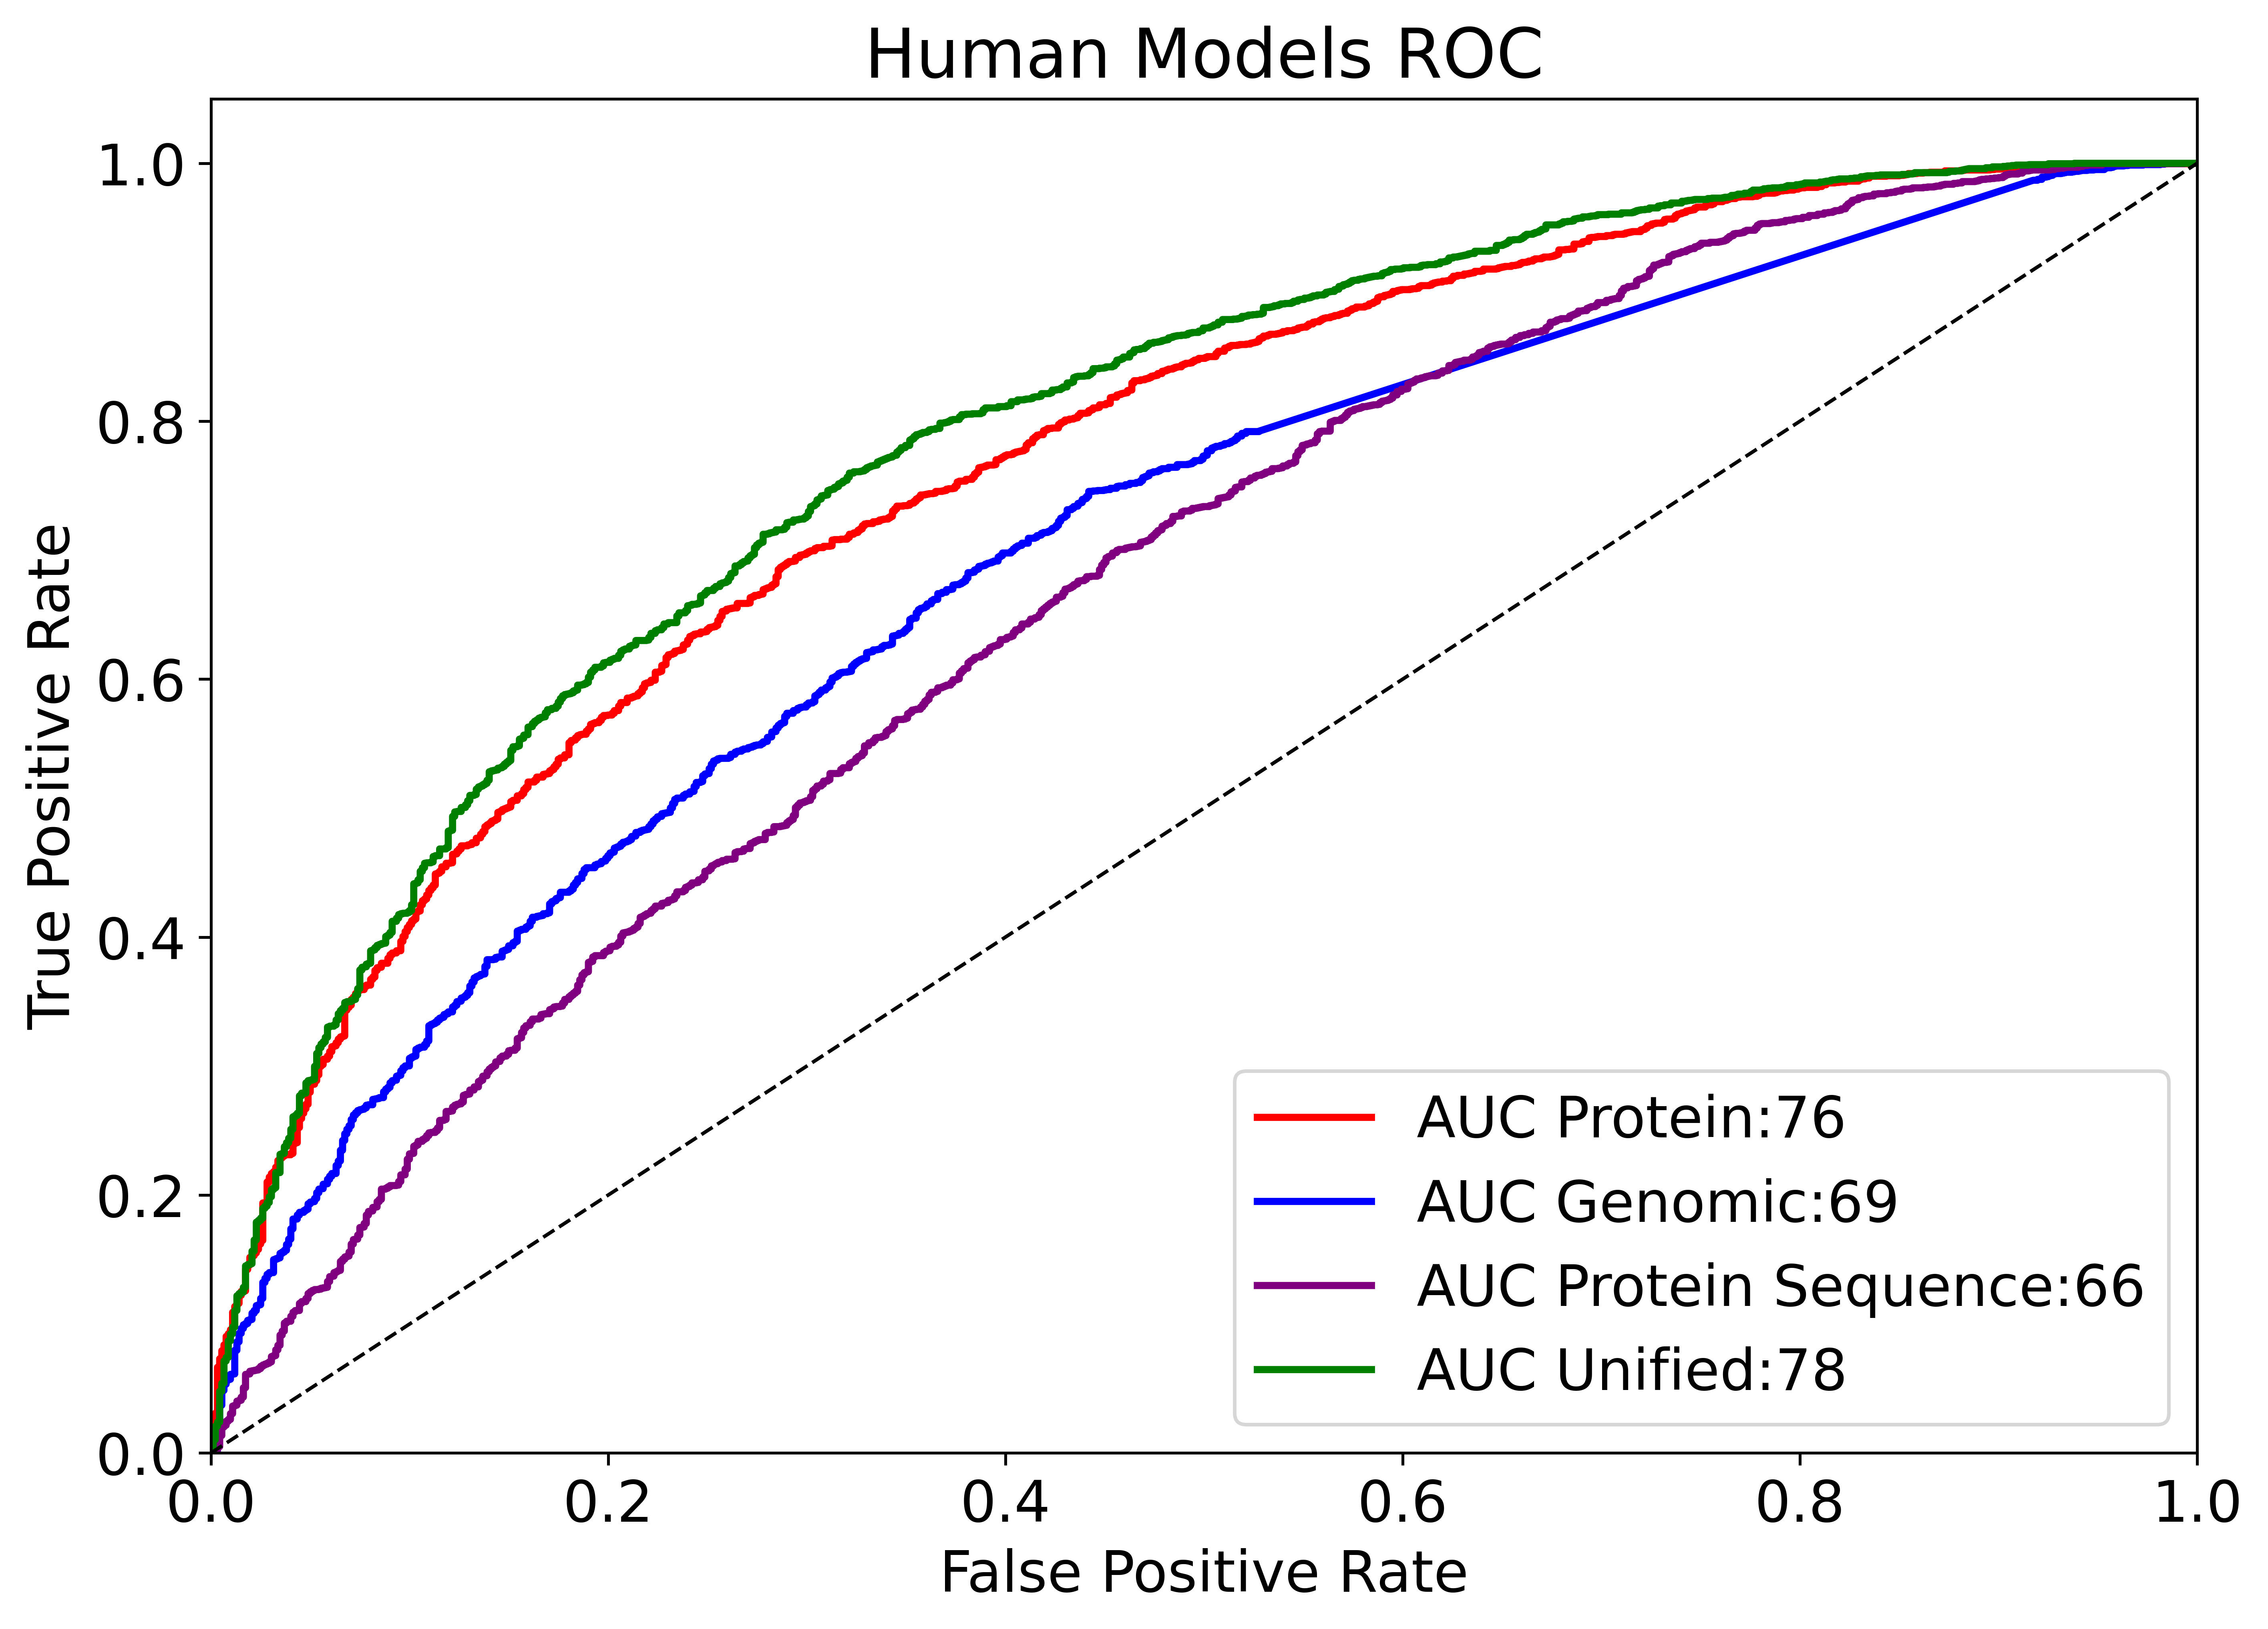

In [14]:
# Assuming y1 is your label and y2...n are your scores:

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# plt.figure(figsize=(14,10),dpi=640)
plt.figure(figsize=(10,7),dpi=640)
fpr, tpr, thresholds = roc_curve(y1, y2)
auc1 = int(100*auc(fpr,tpr))
plt.plot(fpr, tpr,label="AUC Protein:{}".format(auc1),color='red', linewidth=2)
 # :.2
fpr, tpr, thresholds = roc_curve(y1, y3)
auc1 = int(100*auc(fpr,tpr))
plt.plot(fpr, tpr,label="AUC Genomic:{}".format(auc1),color='blue', linewidth=2)

fpr, tpr, thresholds = roc_curve(y1, y4)
auc1 = int(100*auc(fpr,tpr))
plt.plot(fpr, tpr,label="AUC Protein Sequence:{}".format(auc1),color='purple', linewidth=2)

fpr, tpr, thresholds = roc_curve(y1, y5)
auc1 = int(100*auc(fpr,tpr))
plt.plot(fpr, tpr,label="AUC Unified:{}".format(auc1),color='green', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--', lw=1) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate') 
plt.title('Human Models ROC') 
plt.grid(False)
plt.legend(loc="lower right")
plt.show()